In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
#flatten as this is what tensorflow is expecting
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API 
#the input shape = x_train[0].shape as the images that are being used are of RGB so they are 3 x 3 x 3 x 32 whereas in the mnist dataset it was 1 x 3 x 3 x 32 as it was greyscale

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8)

Epoch 1/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5797 - accuracy: 0.4237 - val_loss: 1.3904 - val_accuracy: 0.4992
Epoch 2/8
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2859 - accuracy: 0.5354 - val_loss: 1.1749 - val_accuracy: 0.5814
Epoch 3/8
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1613 - accuracy: 0.5802 - val_loss: 1.0604 - val_accuracy: 0.6290
Epoch 4/8
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0659 - accuracy: 0.6177 - val_loss: 0.9846 - val_accuracy: 0.6480
Epoch 5/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9901 - accuracy: 0.6466 - val_loss: 0.9653 - val_accuracy: 0.6646
Epoch 6/8
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9363 - accuracy: 0.6670 - val_loss: 0.8885 - val_accuracy: 0.6911
Epoch 7/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8895 - accuracy: 0.6826 - val_loss: 0.8759 - val_accuracy:

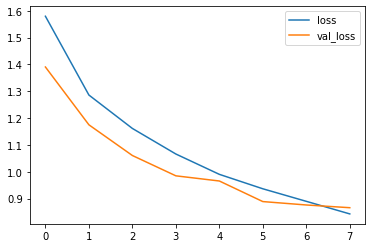

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

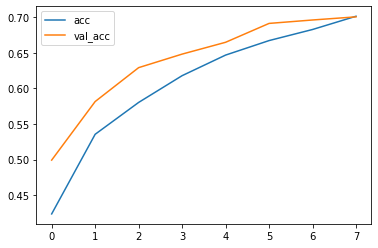

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[801  10  32  10  13   4   8   8  87  27]
 [ 34 762   2   2   6   3   5   0  53 133]
 [ 89   6 574  46 113  80  40  22  22   8]
 [ 52   4  74 371  70 271  65  36  31  26]
 [ 37   3  60  40 698  61  20  64  13   4]
 [ 28   7  52 110  40 683  18  34  21   7]
 [ 13   5  45  50  91  48 715  10  18   5]
 [ 30   2  39  19  60  81   3 741   7  18]
 [ 68  19   4   3  10   5   1   5 859  26]
 [ 41  61  12   5   6   9   7  15  45 799]]


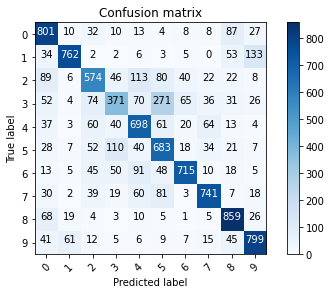

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

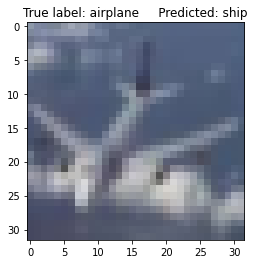

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s     Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

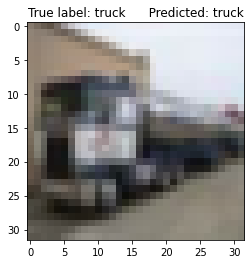

In [ ]:
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s      Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));